In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import skimage

In [8]:
DATASET_NAME = '2024-09-15-driver-segmentation-dataset'
DATASET_DIR = Path(f'/home/lanter/source/driver-dataset/{DATASET_NAME}')

TRAIN_SET_DIR = 'train'
VALID_SET_DIR = 'validation'
TEST_SET_DIR = 'test'

IMAGES_DIR = 'images'
MASKS_DIR = 'masks'

In [13]:
sample_img = DATASET_DIR/TRAIN_SET_DIR/IMAGES_DIR / '2022_09_14_jezek_enyaq-normal-05670.jpg'
sample_mask = DATASET_DIR/TRAIN_SET_DIR/MASKS_DIR / '2022_09_14_jezek_enyaq-normal-05670.png'

img_gray = (255 * skimage.io.imread(sample_img, as_gray=True)).astype('uint8')
mask = skimage.io.imread(sample_mask)
img_gray_masked = img_gray * (mask > 0)

radius = 3
n_points = 8 * radius
lbp = skimage.feature.local_binary_pattern(img_gray_masked, n_points, radius)

canny = skimage.feature.canny(img_gray_masked)

sobel = skimage.filters.sobel(img_gray_masked)

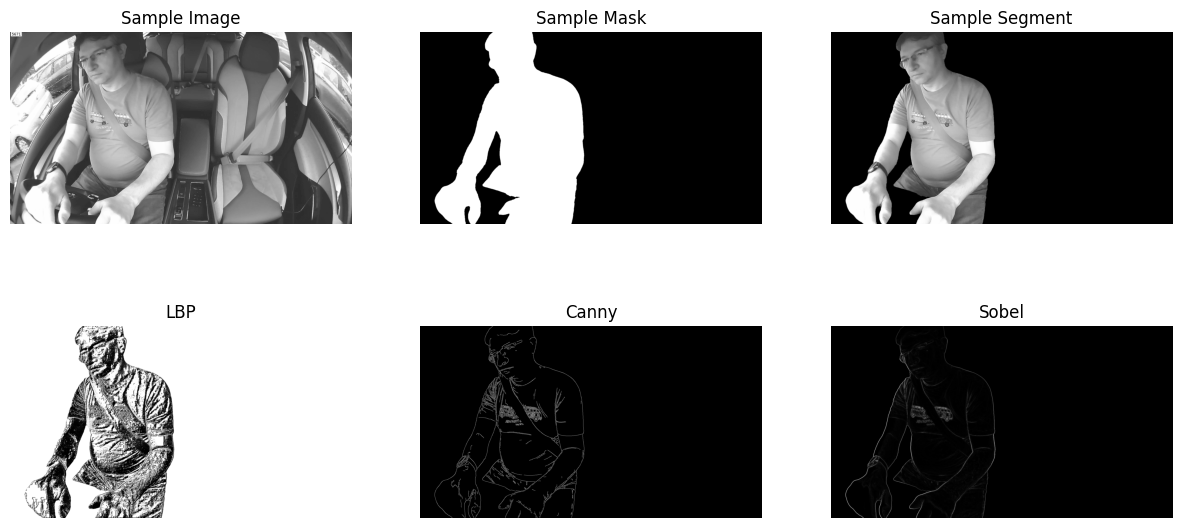

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

axes[0,0].imshow(img_gray, cmap='gray')
axes[0,0].set_title('Sample Image')
axes[0,0].axis('off')

axes[0,1].imshow(mask, cmap='gray')
axes[0,1].set_title('Sample Mask')
axes[0,1].axis('off')

axes[0,2].imshow(img_gray_masked, cmap='gray')
axes[0,2].set_title('Sample Segment')
axes[0,2].axis('off')

axes[1,0].imshow(lbp, cmap='gray')
axes[1,0].set_title('LBP')
axes[1,0].axis('off')

axes[1,1].imshow(canny, cmap='gray')
axes[1,1].set_title('Canny')
axes[1,1].axis('off')

axes[1,2].imshow(sobel, cmap='gray')
axes[1,2].set_title('Sobel')
axes[1,2].axis('off')

plt.show()